In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Breast_Cancer.csv')
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [4]:
df = data.copy()

In [5]:
df.rename(columns=
    {'Age':'age',
    'Race':'race',
    'Marital Status':'marital_status',
    'T Stage ':'t_stage',
    'N Stage':'n_stage',
    '6th Stage':'sixth_stage',
    'differentiate':'differentiate',
    'Grade':'grade',
    'A Stage':'a_stage',
    'Tumor Size':'tumor_size',
    'Estrogen Status':'estrogen_status',
    'Progesterone Status': 'progesterone_status',
    'Regional Node Examined':'regional_node_examined',
    'Reginol Node Positive':'regional_node_positive',
    'Survival Months':'survival_months',
    'Status':'status'},inplace=True )
df.head()

,age,race,marital_status,t_stage,n_stage,sixth_stage,differentiate,grade,a_stage,tumor_size,estrogen_status,progesterone_status,regional_node_examined,regional_node_positive,survival_months,status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [6]:
df['t_stage'].value_counts()

T2    1786
T1    1603
T3     533
T4     102
Name: t_stage, dtype: int64

In [7]:
df['n_stage'].value_counts()

N1    2732
N2     820
N3     472
Name: n_stage, dtype: int64

In [8]:
df['sixth_stage'].value_counts()

IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: sixth_stage, dtype: int64

In [9]:
df['differentiate'].value_counts()

Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: differentiate, dtype: int64

In [10]:
df['grade'].unique()

array(['3', '2', '1', ' anaplastic; Grade IV'], dtype=object)

In [11]:
df['a_stage'].unique()

array(['Regional', 'Distant'], dtype=object)

## Brief information about the columns

### TNM system

Usually the "TNM" system is used for describing stages and features of breast cancer: Tumor (T), Node (N), Metastasis (M). But this dataset doesn't provide with "M" information.
The "T" plus a letter or number (0 to 4) is used to describe the size and location of the tumor. In this dataset you can see only the "T" plus a number.
The "N" in the TNM staging system stands for lymph nodes. The "N" plus number is used to describe how many nodes are affected by cancer.

### Differentiation of carcinomas and Grade of differentiation

The column "Differentiate" shows the information:
   * well-differentiated carcinomas have relatively normal-looking cells that do not appear to be growing rapidly.    These cancers tend to grow and spread slowly and have a better prognosis (outlook),
   * poorly differentiated carcinomas lack normal features, tend to grow and spread faster, and have a worse          prognosis,
   * moderately differentiated carcinomas have features and a prognosis in between these two,
   * undifferentiated cancer is a rare form of lymphoma that occurs in some people who’ve had breast implants.        It’s a type of immune system cancer and isn’t breast cancer.
   
The column "Grade" provides with grades that are are similar to what is described in the question above about differentiation. Numbers are assigned to different features (gland formation, nuclear grade, and mitotic count) seen under the microscope and then added up to assign the grade.
   * If the numbers add up to 3-5, the cancer is grade 1 (well differentiated).
   * If they add up to 6 or 7, it means the cancer is grade 2 (moderately differentiated).
   * If they add up to 8 or 9, it means the cancer is grade 3 (poorly differentiated).

### Local, regional or distant?

The column "A stage" gives us information about additional classification:
   * Regional: the lymph nodes, primarily those in the armpit, are involved,
   * Distant: the cancer is found in other parts of the body as well,
   * Local: the cancer is confined within the breast - this type isn't represented in the dataset.

### Hormone status

If breast cancer cells have estrogen receptors, the cancer is called ER-positive breast cancer. If breast cancer cells have progesterone receptors, the cancer is called PR-positive breast cancer. If the cells do not have either of these 2 receptors, the cancer is called ER/PR-negative.

Hormone therapy blocks ER-positive and/or PR-positive tumors from using estrogen and/or progesterone, which slows or stops tumor growth. 

### Stage groups for breast cancer

Doctors assign the stage of the cancer by combining the T, N, and M classifications (see above), the tumor grade, and the results of ER/PR: 


* Stage 0 describes disease that is only in the ducts of the breast tissue and has not spread to the surrounding tissue of the breast.


* Stage IA: The tumor is small, invasive, and has not spread to the lymph node.


* Stage IB: Cancer has spread to the lymph nodes and the cancer in the lymph node is larger than 0.2 mm but less than 2 mm in size. There is either no evidence of a tumor in the breast or the tumor in the breast is 20 mm or smaller.

   
* Stage IIA: Any 1 of these conditions:
   * There is no evidence of a tumor in the breast, but the cancer has spread to 1 to 3 axillary lymph nodes. It has not spread to distant parts of the body.
   * The tumor is 20 mm or smaller and has spread to 1 to 3 axillary lymph nodes.
   * The tumor is larger than 20 mm but not larger than 50 mm and has not spread to the axillary lymph nodes.
   

* Stage IIB: Either of these conditions:
   * The tumor is larger than 20 mm but not larger than 50 mm and has spread to 1 to 3 axillary lymph nodes.
   * The tumor is larger than 50 mm but has not spread to the axillary lymph nodes.
   

* Stage IIIA: The tumor of any size has spread to 4 to 9 axillary lymph nodes or to internal mammary lymph nodes. It has not spread to other parts of the body. Stage IIIA may also be a tumor larger than 50 mm that has spread to 1 to 3 axillary lymph nodes


* Stage IIIB: The tumor has spread to the chest wall or caused swelling or ulceration of the breast, or it is diagnosed as inflammatory breast cancer. It may or may not have spread to up to 9 axillary or internal mammary lymph nodes. It has not spread to other parts of the body.


* Stage IIIC: A tumor of any size that has spread to 10 or more axillary lymph nodes, the internal mammary lymph nodes, and/or the lymph nodes under the collarbone. It has not spread to other parts of the body).

* Stage IV (metastatic): The tumor can be any size and has spread to other organs, such as the bones, lungs, brain, liver, distant lymph nodes, or chest wall.

## Research

### Correlation

<AxesSubplot:>

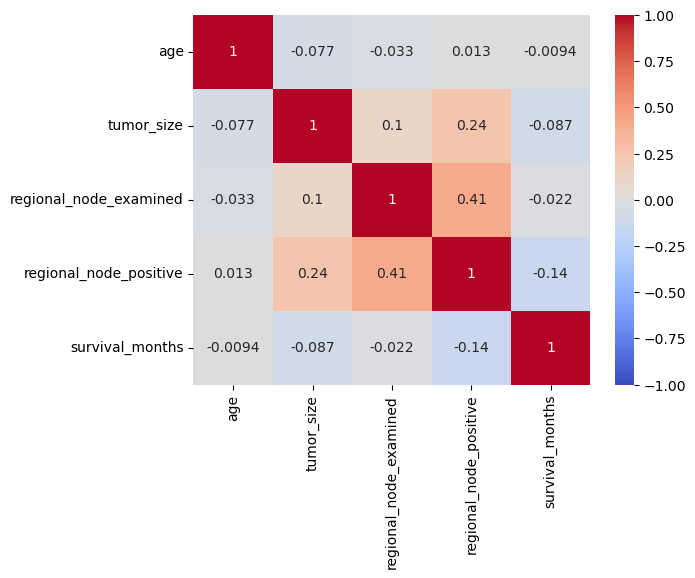

In [12]:
sns.heatmap(df.corr(),
            annot=True,
            vmin=-1,
            vmax=1,
            center=0,
            cmap='coolwarm')

### Age

In [13]:
var_hist=df.age.describe()
var_hist

count    4024.000000
mean       53.972167
std         8.963134
min        30.000000
25%        47.000000
50%        54.000000
75%        61.000000
max        69.000000
Name: age, dtype: float64

In [14]:
df.age.mode()

0    46
Name: age, dtype: int64

In [15]:
df.race.unique()

array(['White', 'Black', 'Other'], dtype=object)

Text(10, 0.025, 'max = 69 \nmin = 30 \nmean = 54 \nmode = 46')

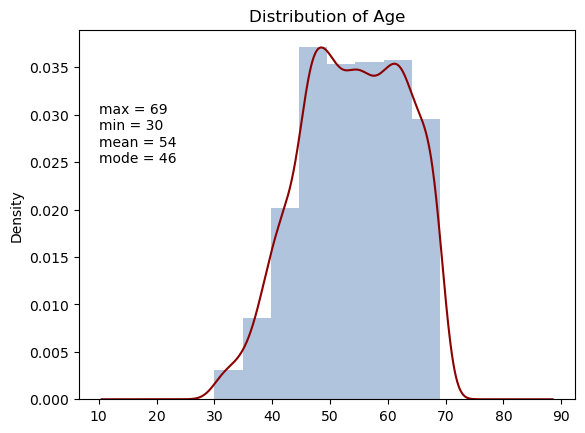

In [16]:
ax = df.age.plot(kind='hist', title='Distribution of Age', color='lightsteelblue', density=True, bins=8)
df.age.plot(kind='kde', color='darkred')
ax.annotate(
    f'max = {var_hist[7]:.0f} \nmin = {var_hist[3]:.0f} \nmean = {var_hist[1]:.0f} \nmode = {df.age.mode()[0]}',
    xy=(10,0.035), xytext=(10,0.025)
)

In [17]:
white_age = df.loc[(df.race==df.race.unique()[0])].age.describe().to_dict()
white_age

{'count': 3413.0,
 'mean': 54.32903603867565,
 'std': 8.851773597267544,
 'min': 30.0,
 '25%': 48.0,
 '50%': 55.0,
 '75%': 62.0,
 'max': 69.0}

In [18]:
black_age = df.loc[(df.race==df.race.unique()[1])].age.describe().to_dict()
black_age

{'count': 291.0,
 'mean': 52.580756013745706,
 'std': 9.049833725597123,
 'min': 31.0,
 '25%': 46.0,
 '50%': 53.0,
 '75%': 60.0,
 'max': 69.0}

In [19]:
other_age = df.loc[(df.race==df.race.unique()[2])].age.describe().to_dict()
other_age

{'count': 320.0,
 'mean': 51.43125,
 'std': 9.541279315258873,
 'min': 30.0,
 '25%': 44.0,
 '50%': 51.0,
 '75%': 60.0,
 'max': 69.0}

In [20]:
type(white_age)

dict

In [21]:
df.race.unique()

array(['White', 'Black', 'Other'], dtype=object)

In [22]:
mode_list=[]
for i in df.race.unique():
    mode_list.extend(df.loc[(df.race==i)].age.mode())
mode_list

[47, 46, 56]

Text(0.5, 0.98, 'Distribution of Age by Race')

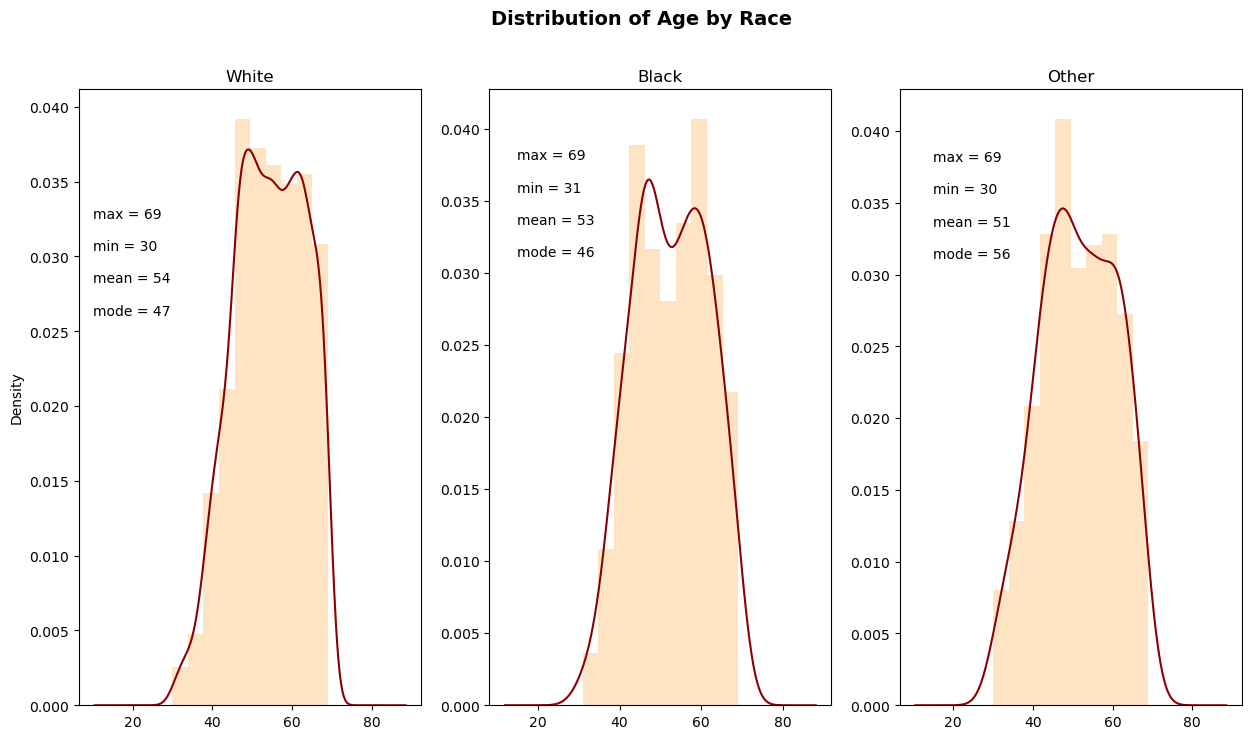

In [23]:
fig, axes = plt.subplots(1,3, figsize=(15,8))

ax1=axes[0]
ax2=axes[1]
ax3=axes[2]

ax1=df.loc[(df.race==df.race.unique()[0])].age.plot.hist(ax=ax1, 
                                                         bins=10, 
                                                         density=True, 
                                                         color='bisque',
                                                         title=df.race.unique()[0])
df.loc[(df.race==df.race.unique()[0])].age.plot(ax=ax1, 
                                           kind='kde', 
                                           color='darkred')
ax1.annotate(
    f'''max = {white_age['max']:.0f} 
    \nmin = {white_age['min']:.0f} 
    \nmean = {white_age['mean']:.0f}  
    \nmode = {mode_list[0]}
    ''',
    xy=(10,0.035), xytext=(10,0.025)
)
ax2=df.loc[(df.race==df.race.unique()[1])].age.plot.hist(ax=ax2, 
                                                    bins=10,
                                                    density=True,
                                                    color='bisque',
                                                    title=df.race.unique()[1])
df.loc[(df.race==df.race.unique()[1])].age.plot(ax=ax2, 
                                           kind='kde',
                                           color='darkred')
ax2.set(ylabel=None)
ax2.annotate(
    f'''max = {black_age['max']:.0f} 
    \nmin = {black_age['min']:.0f} 
    \nmean = {black_age['mean']:.0f}  
    \nmode = {mode_list[1]}
    ''',
    xy=(15,0.035), xytext=(15,0.030)
)

ax3=df.loc[(df.race==df.race.unique()[2])].age.plot.hist(ax=ax3, 
                                                    bins=10,
                                                    density=True,
                                                    color='bisque',
                                                    title=df.race.unique()[2])
df.loc[(df.race==df.race.unique()[2])].age.plot(ax=ax3, 
                                           kind='kde',
                                           color='darkred')
ax3.set(ylabel=None)
ax3.annotate(
    f'''max = {other_age['max']:.0f} 
    \nmin = {other_age['min']:.0f} 
    \nmean = {other_age['mean']:.0f}  
    \nmode = {mode_list[2]}
    ''',
    xy=(15,0.035), xytext=(15,0.030)
)

plt.suptitle('Distribution of Age by Race', fontsize=14, fontweight='bold')

### Tumor Size

In [24]:
df.tumor_size.value_counts().head(15)

15    271
25    268
30    228
20    211
35    161
18    158
40    145
17    120
12    118
22    115
21    108
16    104
50     93
60     92
10     92
Name: tumor_size, dtype: int64

In [25]:
tumor_descr = df.tumor_size.describe().to_dict()
tumor_descr

{'count': 4024.0,
 'mean': 30.47365805168986,
 'std': 21.119696090413314,
 'min': 1.0,
 '25%': 16.0,
 '50%': 25.0,
 '75%': 38.0,
 'max': 140.0}

Text(0.5, 1.0, 'Distribution of Tumor Size')

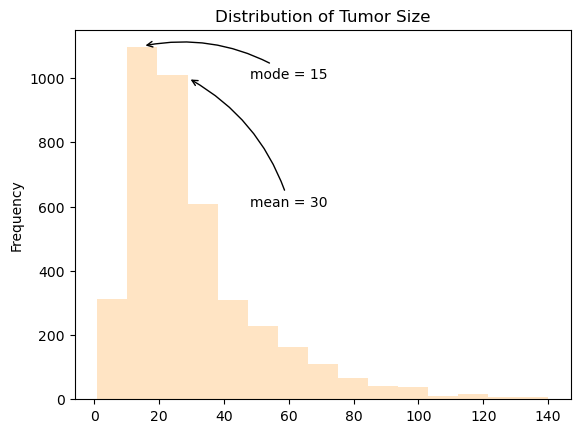

In [26]:
fig, ax = plt.subplots()


ax=df.tumor_size.plot.hist(color='bisque', bins=15)
ax.annotate(f'mode = {df.tumor_size.mode()[0]}', 
            xy=(15,1100), 
            xytext=(60,1000),
            arrowprops={'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.2'},
            horizontalalignment='center')

ax.annotate(f'mean = {tumor_descr["mean"]:.0f}', 
            xy=(29,1000), 
            xytext=(60,600),
            arrowprops={'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.2'},
            horizontalalignment='center')
ax.set_title('Distribution of Tumor Size')


[Text(0.5, 4.444444444444445, ''), Text(24.0, 0.5, 'Tumor Size')]

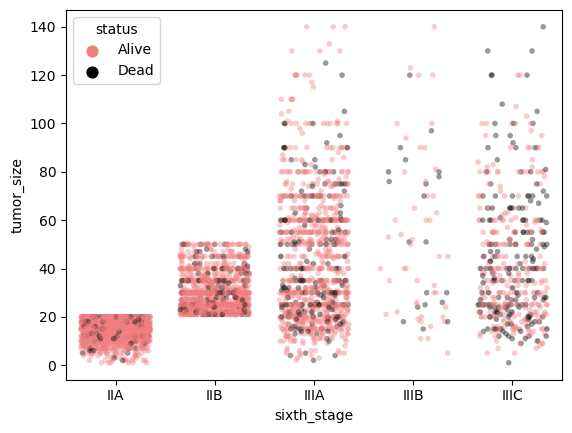

In [27]:
sns.stripplot(
    x='sixth_stage',
    y='tumor_size',
    hue='status',
    data=df,
    size=4,
    alpha=0.4,
    jitter=0.35,
    order=['IIA','IIB','IIIA','IIIB','IIIC'],
    palette={'Alive':'lightcoral','Dead':'black'}
)
ax.set(xlabel='', ylabel='Tumor Size')

Text(0.5, 0.98, 'Distribution of Tumor Size by Stages')

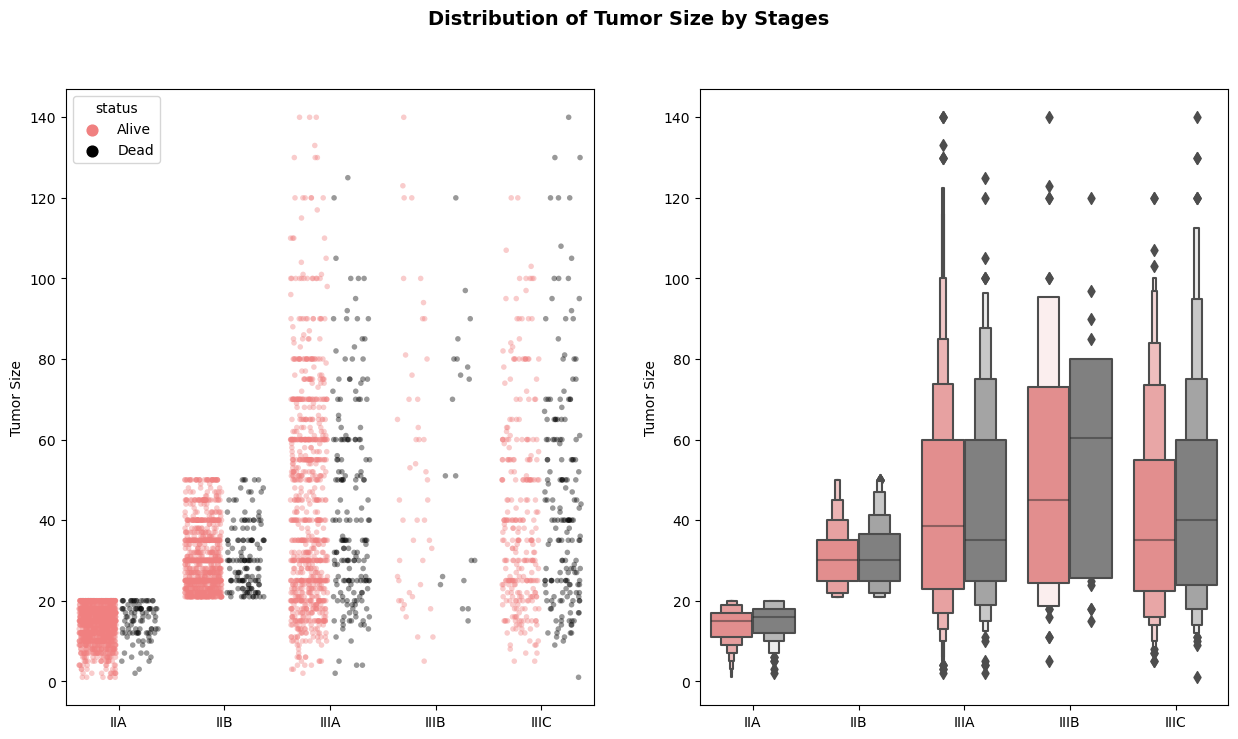

In [512]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,8))

sns.stripplot(
    ax=ax1,
    x='sixth_stage',
    y='tumor_size',
    hue='status',
    dodge=True,
    data=df,
    size=4,
    alpha=0.4,
    jitter=0.35,
    order=['IIA','IIB','IIIA','IIIB','IIIC'],
    palette={'Alive':'lightcoral','Dead':'black'}
)
ax1.set(xlabel='', ylabel='Tumor Size')

sns.boxenplot(
    ax=ax2,
    x='sixth_stage',
    y='tumor_size',
    hue='status',
    data=df,
    order=['IIA','IIB','IIIA','IIIB','IIIC'],
    palette={'Alive':'lightcoral','Dead':'grey'}
)
ax2.set(xlabel='', ylabel='Tumor Size')
ax2.get_legend().remove()
plt.suptitle('Distribution of Tumor Size by Stages', fontsize=14, fontweight='bold')

In [29]:
stages_status_count = df.groupby('sixth_stage').status.value_counts()
stages_status_count

sixth_stage  status
IIA          Alive     1209
             Dead        96
IIB          Alive      995
             Dead       135
IIIA         Alive      866
             Dead       184
IIIB         Alive       47
             Dead        20
IIIC         Alive      291
             Dead       181
Name: status, dtype: int64

In [30]:
stages_count = df.sixth_stage.value_counts().sort_index()
stages_count

IIA     1305
IIB     1130
IIIA    1050
IIIB      67
IIIC     472
Name: sixth_stage, dtype: int64

Text(0.5, 1.0, 'Quantity of cases by Stage')

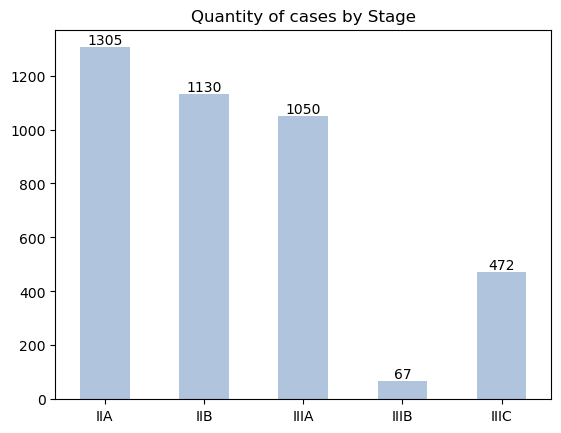

In [31]:
ax=stages_count.plot.bar(color='lightsteelblue',
                  rot=360)
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_title('Quantity of cases by Stage')

In [32]:
status_pct = stages_status_count.divide(stages_count, level=0)
status_pct

sixth_stage  status
IIA          Alive     0.926437
             Dead      0.073563
IIB          Alive     0.880531
             Dead      0.119469
IIIA         Alive     0.824762
             Dead      0.175238
IIIB         Alive     0.701493
             Dead      0.298507
IIIC         Alive     0.616525
             Dead      0.383475
dtype: float64

In [33]:
df_status_pct = status_pct.to_frame()
df_status_pct

0
sixth_stage status          
IIA         Alive   0.926437
            Dead    0.073563
IIB         Alive   0.880531
            Dead    0.119469
IIIA        Alive   0.824762
            Dead    0.175238
IIIB        Alive   0.701493
            Dead    0.298507
IIIC        Alive   0.616525
            Dead    0.383475

In [34]:
df_piv_stat = df_status_pct.pivot_table(values=[0],
                                        columns=['status'],
                                        index=['sixth_stage']).droplevel(0, axis=1)*100
df_piv_stat

status,Alive,Dead
sixth_stage,,
IIA,92.643678,7.356322
IIB,88.053097,11.946903
IIIA,82.476190,17.523810
IIIB,70.149254,29.850746
IIIC,61.652542,38.347458


Text(0.5, 1.0, 'Status in % by Stages')

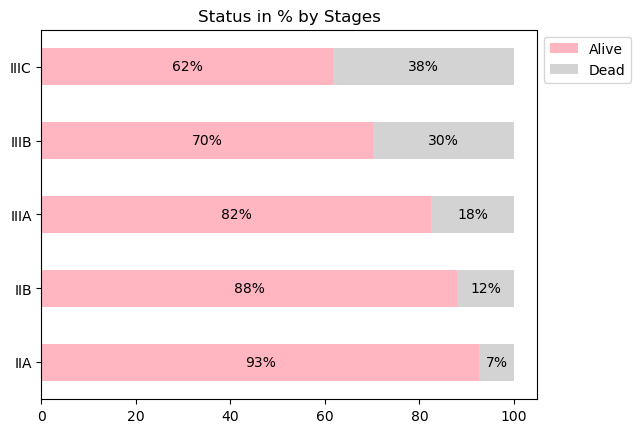

In [35]:
ax=df_piv_stat.plot.barh(
          stacked=True,
          color={'Alive':'lightpink','Dead':'lightgray'},
          rot=360)

ax.legend(bbox_to_anchor=(1,1))
plt.ylabel('')
ax.bar_label(ax.containers[0], label_type='center', fmt='%.0f%%')
ax.bar_label(ax.containers[1], label_type='center',fmt='%.0f%%')
ax.set_title('Status in % by Stages')

### Node

In [36]:
ex_descr=df.regional_node_examined.describe().to_dict()
ex_descr

{'count': 4024.0,
 'mean': 14.35710735586481,
 'std': 8.099674806654786,
 'min': 1.0,
 '25%': 9.0,
 '50%': 14.0,
 '75%': 19.0,
 'max': 61.0}

In [37]:
posit_descr=df.regional_node_positive.describe().to_dict()
posit_descr

{'count': 4024.0,
 'mean': 4.158051689860835,
 'std': 5.10933112162216,
 'min': 1.0,
 '25%': 1.0,
 '50%': 2.0,
 '75%': 5.0,
 'max': 46.0}

Text(0.5, 0.98, 'Regional Nodes')

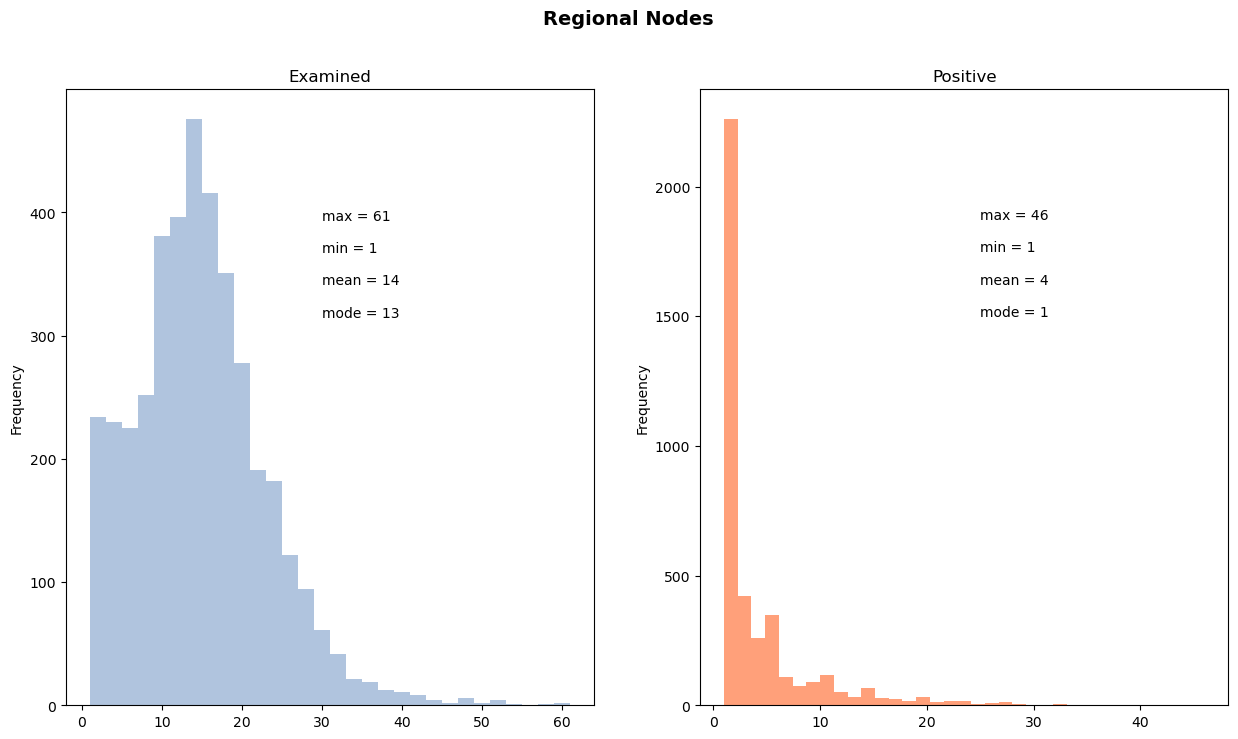

In [554]:
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(15,8))

df.regional_node_examined.plot(ax=ax1,
                               kind='hist',
                               color='lightsteelblue',
                               bins=30,
                               title='Examined')
ax1.annotate(f'''max = {ex_descr['max']:.0f} 
             \nmin = {ex_descr['min']:.0f}
             \nmean = {ex_descr['mean']:.0f} 
             \nmode = {df.regional_node_examined.mode()[0]}''',
             xy=(25,400), 
             xytext=(30,315))


df.regional_node_positive.plot(ax=ax2,
                               kind='hist',
                               color='lightsalmon',
                               bins=35,
                               title='Positive')
ax2.annotate(f'''max = {posit_descr['max']:.0f} 
            \nmin = {posit_descr['min']:.0f}
            \nmean = {posit_descr['mean']:.0f} 
            \nmode = {df.regional_node_positive.mode()[0]}''',
            xy=(25,2000), 
            xytext=(25,1500))

plt.suptitle('Regional Nodes', fontsize=14, fontweight='bold')

Text(0.5, 0.98, 'Distribution Examined/Positive Nodes by Stages')

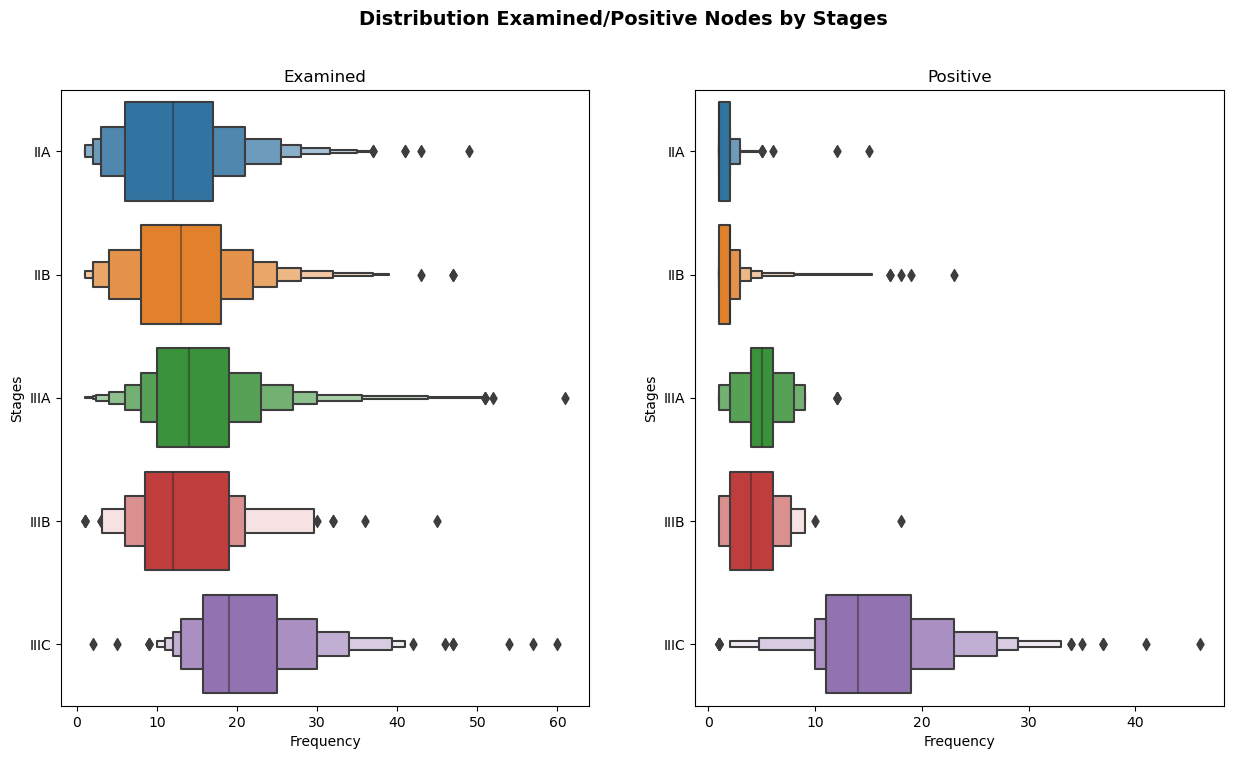

In [101]:
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(15,8))
sns.boxenplot(x='regional_node_examined',
              y='sixth_stage',
              data=df,
              ax=ax1,
              order=['IIA','IIB','IIIA','IIIB','IIIC'])
ax1.set(xlabel='Frequency', ylabel='Stages', title='Examined')
sns.boxenplot(x='regional_node_positive',
              y='sixth_stage',
              data=df,
              ax=ax2,
              order=['IIA','IIB','IIIA','IIIB','IIIC'])
ax2.set(xlabel='Frequency', ylabel='Stages', title='Positive')
plt.suptitle('Distribution Examined/Positive Nodes by Stages',
            fontsize=14,
            fontweight='bold')

### Differentiation of carcinomas 

In [201]:
dif_counts=df.differentiate.value_counts().drop('Undifferentiated')
dif_counts

Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Name: differentiate, dtype: int64

[Text(0.5, 1.0, 'Differentitation in %')]

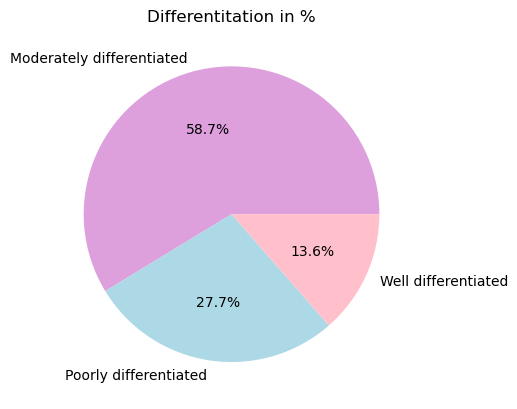

In [234]:
fig, ax=plt.subplots()
dif_counts.plot(kind='pie', 
                ylabel='',
                autopct='%1.1f%%',
                colors=['plum','lightblue','pink'])
ax.set(title='Differentitation in %')

In [239]:
#stages=['IIA','IIB','IIIA','IIIB','IIIC']
dif_stage=df.query('differentiate!="Undifferentiated"').groupby(['sixth_stage','differentiate']).age.count()
dif_stage

sixth_stage  differentiate            
IIA          Moderately differentiated    801
             Poorly differentiated        251
             Well differentiated          249
IIB          Moderately differentiated    663
             Poorly differentiated        314
             Well differentiated          151
IIIA         Moderately differentiated    625
             Poorly differentiated        315
             Well differentiated          102
IIIB         Moderately differentiated     35
             Poorly differentiated         24
             Well differentiated            8
IIIC         Moderately differentiated    227
             Poorly differentiated        207
             Well differentiated           33
Name: age, dtype: int64

In [245]:
df.query('differentiate!="Undifferentiated"')['sixth_stage'].value_counts()

IIA     1301
IIB     1128
IIIA    1042
IIIC     467
IIIB      67
Name: sixth_stage, dtype: int64

In [246]:
pct_dif=dif_stage.divide(df.query('differentiate!="Undifferentiated"')['sixth_stage'].value_counts(), 
                         level=0)*100
pct_dif=pct_dif.to_frame()
pct_dif

0
sixth_stage differentiate                  
IIA         Moderately differentiated 61.57
            Poorly differentiated     19.29
            Well differentiated       19.14
IIB         Moderately differentiated 58.78
            Poorly differentiated     27.84
            Well differentiated       13.39
IIIA        Moderately differentiated 59.98
            Poorly differentiated     30.23
            Well differentiated        9.79
IIIB        Moderately differentiated 52.24
            Poorly differentiated     35.82
            Well differentiated       11.94
IIIC        Moderately differentiated 48.61
            Poorly differentiated     44.33
            Well differentiated        7.07

In [247]:
pct_dif_piv=pd.pivot_table(values=[0],
                            columns=['differentiate'],
                            index=['sixth_stage'],
                            data=pct_dif).droplevel(0, axis=1)
pct_dif_piv

differentiate,Moderately differentiated,Poorly differentiated,Well differentiated
sixth_stage,,,
IIA,61.57,19.29,19.14
IIB,58.78,27.84,13.39
IIIA,59.98,30.23,9.79
IIIB,52.24,35.82,11.94
IIIC,48.61,44.33,7.07


[Text(0.5, 1.0, 'Differentiation of Carcinoma in % by Stages'),
 Text(0, 0.5, 'Stages'),
 Text(0.5, 0, '%')]

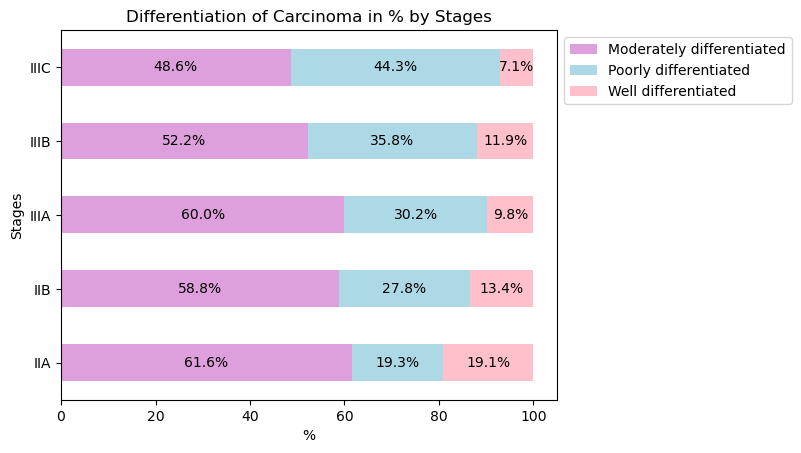

In [251]:
ax=pct_dif_piv.plot.barh(stacked=True,
                         color={'Moderately differentiated':'plum',
                                'Poorly differentiated':'lightblue',
                                'Well differentiated':'pink'})
ax.legend(bbox_to_anchor=(1,1))
ax.bar_label(ax.containers[0], label_type='center', fmt='%.1f%%')
ax.bar_label(ax.containers[1], label_type='center', fmt='%.1f%%')
ax.bar_label(ax.containers[2], label_type='center', fmt='%.1f%%')
ax.set(title='Differentiation of Carcinoma in % by Stages', ylabel='Stages', xlabel='%')

In [253]:
df.head()

,age,race,marital_status,t_stage,n_stage,sixth_stage,differentiate,grade,a_stage,tumor_size,estrogen_status,progesterone_status,regional_node_examined,regional_node_positive,survival_months,status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [254]:
df['a_stage'].value_counts()

Regional    3932
Distant       92
Name: a_stage, dtype: int64

In [256]:
df_distant=df.query('a_stage=="Distant"')

In [257]:
df_distant.describe()

,age,tumor_size,regional_node_examined,regional_node_positive,survival_months
count,92.00,92.00,92.00,92.00,92.00
mean,52.75,47.58,18.01,11.93,60.79
std,9.33,28.09,7.55,7.85,28.73
min,34.00,5.00,1.00,1.00,8.00
25%,47.00,25.00,14.00,5.00,40.00
50%,52.00,40.00,17.00,12.00,60.50
75%,60.25,65.50,23.00,17.00,86.25
max,69.00,120.00,41.00,37.00,107.00


In [264]:
df_distant.groupby(['sixth_stage', 'status']).size()

sixth_stage  status
IIIB         Alive     16
             Dead       8
IIIC         Alive     41
             Dead      27
dtype: int64

In [260]:
df_distant.groupby(['sixth_stage', 'status']).tumor_size.min()

sixth_stage  status
IIIB         Alive      5
             Dead      26
IIIC         Alive      9
             Dead      12
Name: tumor_size, dtype: int64

In [261]:
df_distant.groupby(['sixth_stage', 'status']).tumor_size.max()

sixth_stage  status
IIIB         Alive     100
             Dead      120
IIIC         Alive     120
             Dead      120
Name: tumor_size, dtype: int64

In [266]:
df_distant.groupby(['sixth_stage', 'estrogen_status']).size()

sixth_stage  estrogen_status
IIIB         Negative            8
             Positive           16
IIIC         Negative            8
             Positive           60
dtype: int64

In [268]:
df_distant.groupby(['sixth_stage', 'progesterone_status']).size()

sixth_stage  progesterone_status
IIIB         Negative                8
             Positive               16
IIIC         Negative               14
             Positive               54
dtype: int64

In [289]:
nn_hormone=df_distant.groupby(['estrogen_status', 
                    'progesterone_status']).get_group(('Negative',
                                                       'Negative'))
nn_hormone.shape

(14, 16)

In [286]:
df_distant.groupby('status').size()/df_distant.status.count()

status
Alive   0.62
Dead    0.38
dtype: float64

In [295]:
nn_hormone.groupby('status').size()/nn_hormone.status.count()

status
Alive   0.14
Dead    0.86
dtype: float64

86 % пациенток с дистант и негативным гормонным статусом мертвы

### hormone status

In [322]:
count_e_p_neg=df.groupby(['estrogen_status', 'progesterone_status'])\
    .get_group(('Negative','Negative'))\
    .age.count()
count_e_p_neg

242

In [323]:
count_e_p_pos=df.groupby(['estrogen_status', 'progesterone_status'])\
    .get_group(('Positive','Positive'))\
    .age.count()
count_e_p_pos

3299

In [325]:
count_epos_pneg=df.groupby(['estrogen_status', 'progesterone_status'])\
    .get_group(('Positive','Negative'))\
    .age.count()
count_epos_pneg

456

In [326]:
count_eneg_ppos=df.groupby(['estrogen_status', 'progesterone_status'])\
    .get_group(('Negative','Positive'))\
    .age.count()
count_eneg_ppos

27

In [410]:
counts_hormon_status=pd.DataFrame(index=['E- P-','E+ P+','E+ P-','E- P+'],
                                  data=[count_e_p_neg,count_e_p_pos,count_epos_pneg,count_eneg_ppos])
counts_hormon_status

,0
E- P-,242
E+ P+,3299
E+ P-,456
E- P+,27


Text(0.5, 0.98, 'Hormone Status of Breast Cancer')

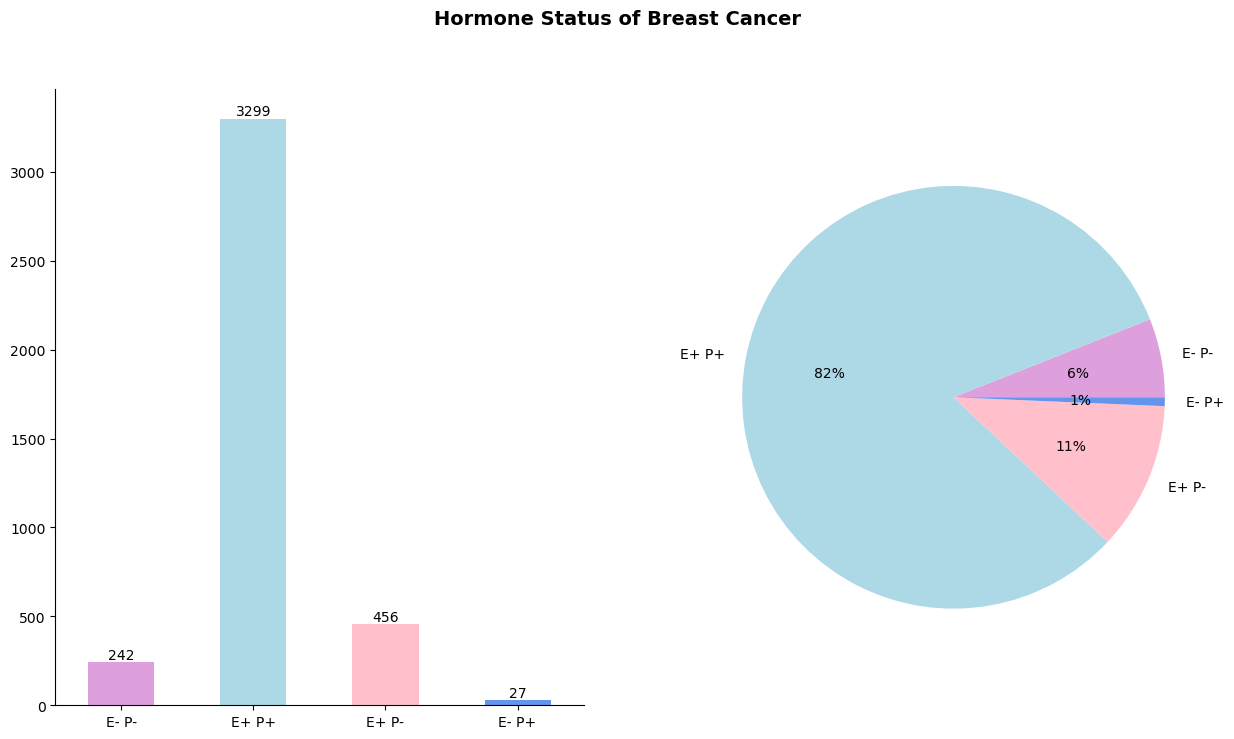

In [411]:
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(15,8))

counts_hormon_status.plot(kind='bar',
                          legend=False,
                          rot=360,
                          color='lightsteelblue',
                          ax=ax1)
ax1.bar_label(ax1.containers[0], label_type='edge')

colors=['plum','lightblue','pink','cornflowerblue']
for patch,color in zip(ax1.patches,colors):
    patch.set_facecolor(color)
ax1.spines[['top','right']].set_visible(False)

counts_hormon_status.plot(kind='pie', 
                ylabel='',
                autopct='%1.0f%%',
                colors=['plum','lightblue','pink','cornflowerblue'],
                subplots=True,
                legend=False,
                ax=ax2)
plt.suptitle('Hormone Status of Breast Cancer', fontsize=14, fontweight='bold')


Text(0.5, 0.98, 'Hormone Statuses in % by Stages')

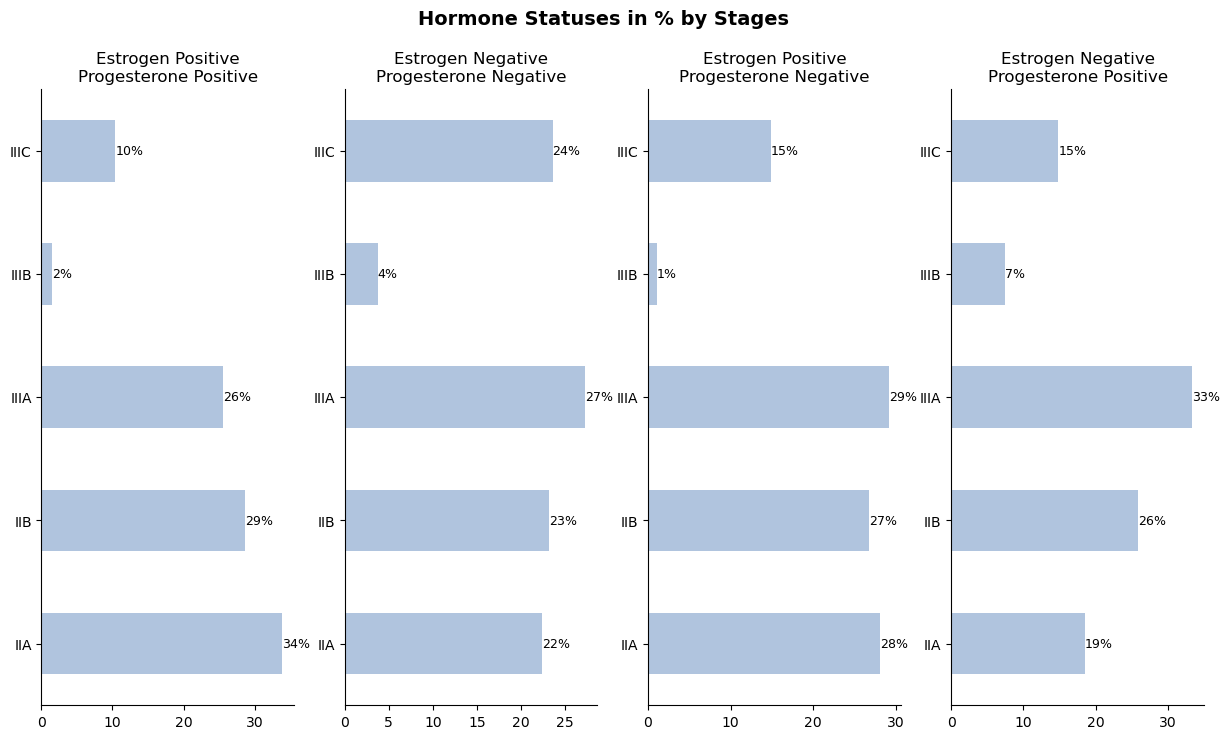

In [494]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4, figsize=(15,8))

plt.rc('ytick', labelsize=10)

pp.plot(kind='barh', ax=ax1, rot=360, color='lightsteelblue')
ax1.spines[['top','right']].set_visible(False)
ax1.set(title='Estrogen Positive\nProgesterone Positive')
ax1.bar_label(ax1.containers[0], label_type='edge', fmt='%1.0f%%',fontsize=9)


nn.plot(kind='barh', ax=ax2, rot=360, color='lightsteelblue')
ax2.spines[['top','right']].set_visible(False)
ax2.set(title='Estrogen Negative\nProgesterone Negative')
ax2.bar_label(ax2.containers[0], label_type='edge', fmt='%1.0f%%',fontsize=9)

pn.plot(kind='barh', ax=ax3, rot=360, color='lightsteelblue')
ax3.spines[['top','right']].set_visible(False)
ax3.set(title='Estrogen Positive\nProgesterone Negative')
ax3.bar_label(ax3.containers[0], label_type='edge', fmt='%1.0f%%',fontsize=9)

np.plot(kind='barh', ax=ax4, rot=360, color='lightsteelblue')
ax4.spines[['top','right']].set_visible(False)
ax4.set(title='Estrogen Negative\nProgesterone Positive')
ax4.bar_label(ax4.containers[0], label_type='edge', fmt='%1.0f%%', fontsize=9)

plt.suptitle('Hormone Statuses in % by Stages',fontsize=14, fontweight='bold')


In [440]:
pp=df.groupby(['estrogen_status', 'progesterone_status'])\
    .get_group(('Positive','Positive'))\
    ['sixth_stage'].value_counts()\
    /df.groupby(['estrogen_status', 'progesterone_status'])\
    .get_group(('Positive','Positive'))\
    ['sixth_stage'].count()*100
pp.sort_index(inplace=True)
pp

IIA    33.89
IIB    28.65
IIIA   25.52
IIIB    1.55
IIIC   10.40
Name: sixth_stage, dtype: float64

In [441]:
nn=df.groupby(['estrogen_status', 'progesterone_status'])\
    .get_group(('Negative','Negative'))\
    ['sixth_stage'].value_counts()\
    /df.groupby(['estrogen_status', 'progesterone_status'])\
    .get_group(('Negative','Negative'))\
    ['sixth_stage'].count()*100
nn.sort_index(inplace=True)
nn

IIA    22.31
IIB    23.14
IIIA   27.27
IIIB    3.72
IIIC   23.55
Name: sixth_stage, dtype: float64

In [442]:
pn=df.groupby(['estrogen_status', 'progesterone_status'])\
    .get_group(('Positive','Negative'))\
    ['sixth_stage'].value_counts()\
    /df.groupby(['estrogen_status', 'progesterone_status'])\
    .get_group(('Positive','Negative'))\
    ['sixth_stage'].count()*100
pn.sort_index(inplace=True)
pn

IIA    28.07
IIB    26.75
IIIA   29.17
IIIB    1.10
IIIC   14.91
Name: sixth_stage, dtype: float64

In [443]:
np=df.groupby(['estrogen_status', 'progesterone_status'])\
    .get_group(('Negative','Positive'))\
    ['sixth_stage'].value_counts()\
    /df.groupby(['estrogen_status', 'progesterone_status'])\
    .get_group(('Negative','Positive'))\
    ['sixth_stage'].count()*100
np.sort_index(inplace=True)
np

IIA    18.52
IIB    25.93
IIIA   33.33
IIIB    7.41
IIIC   14.81
Name: sixth_stage, dtype: float64

Text(0.5, 0.98, 'Distribution of Survival Months by Stages')

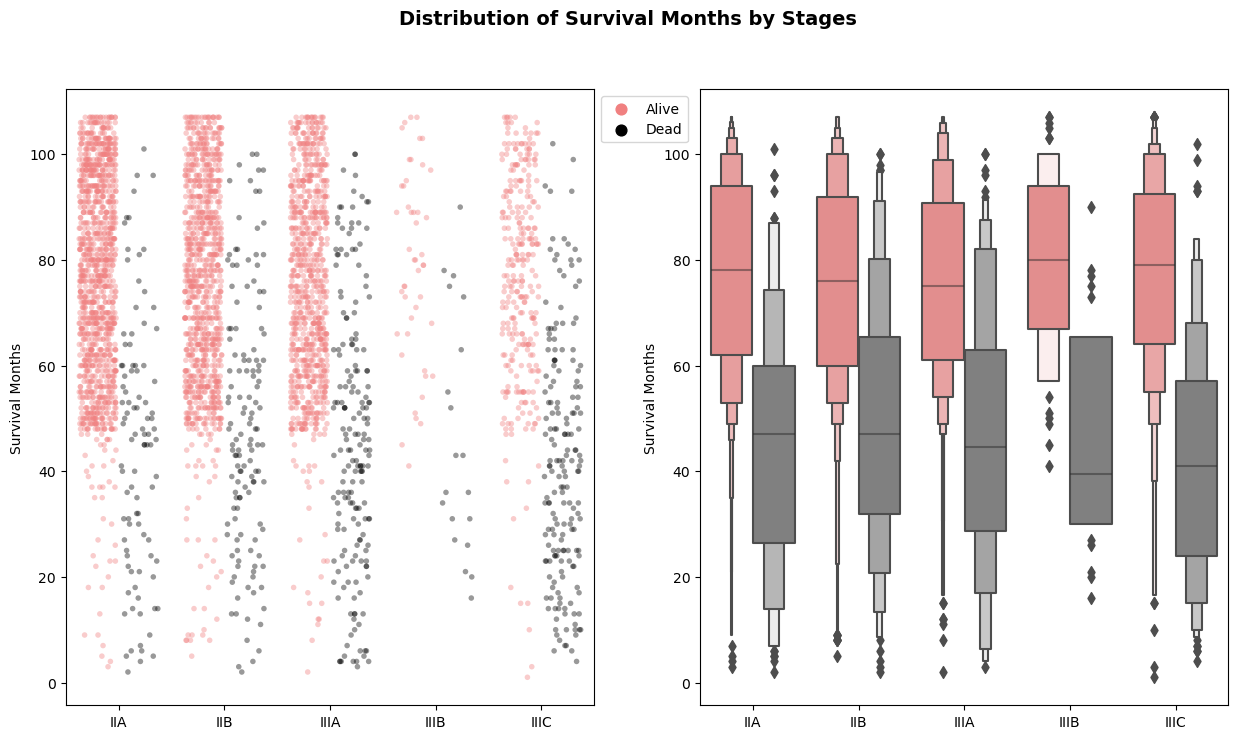

In [510]:
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(15,8))

sns.stripplot(
    ax=ax1,
    x='sixth_stage',
    y='survival_months',
    hue='status',
    dodge=True,
    data=df,
    size=4,
    alpha=0.4,
    jitter=0.35,
    order=['IIA','IIB','IIIA','IIIB','IIIC'],
    palette={'Alive':'lightcoral','Dead':'black'}
)
ax1.set(xlabel='', ylabel='Survival Months')
ax1.legend(bbox_to_anchor=(1,1))

sns.boxenplot(
    ax=ax2,
    x='sixth_stage',
    y='survival_months',
    hue='status',
    data=df,
    order=['IIA','IIB','IIIA','IIIB','IIIC'],
    palette={'Alive':'lightcoral','Dead':'grey'}
)
ax2.get_legend().remove()
ax2.set(xlabel='', ylabel='Survival Months')
plt.suptitle('Distribution of Survival Months by Stages', fontsize=14, fontweight='bold')

In [539]:
for stage in df['sixth_stage'].unique():
    for stat in df.status.unique():
        a=df.query(f'sixth_stage=="{stage}" and status=="{stat}"')['survival_months'].mode()
          df.query('sixth_stage=="IIIA" and status=="Alive"')['survival_months'].value_counts()
        print(f'{stage},{stat}')
        print(a)
        print('-'*50)
    

IIA,Alive
0    98
Name: survival_months, dtype: int64
--------------------------------------------------
IIA,Dead
0    60
Name: survival_months, dtype: int64
--------------------------------------------------
IIIA,Alive
0    63
1    89
Name: survival_months, dtype: int64
--------------------------------------------------
IIIA,Dead
0     4
1    41
2    52
3    53
Name: survival_months, dtype: int64
--------------------------------------------------
IIIC,Alive
0    55
Name: survival_months, dtype: int64
--------------------------------------------------
IIIC,Dead
0    25
Name: survival_months, dtype: int64
--------------------------------------------------
IIB,Alive
0    69
Name: survival_months, dtype: int64
--------------------------------------------------
IIB,Dead
0    59
Name: survival_months, dtype: int64
--------------------------------------------------
IIIB,Alive
0    89
Name: survival_months, dtype: int64
--------------------------------------------------
IIIB,Dead
0    31
1   

In [553]:
for stage in df['sixth_stage'].unique():
    for stat in df.status.unique():
        a=df.query(f'sixth_stage=="{stage}" and status=="{stat}"')['survival_months'].max()
        b=df.query(f'sixth_stage=="{stage}" and status=="{stat}"')['survival_months'].mean()
        c=df.query(f'sixth_stage=="{stage}" and status=="{stat}"')['survival_months'].min()
        d=df.query(f'sixth_stage=="{stage}" and status=="{stat}"')['survival_months'].mode()
        print(f'{stage},{stat}')
        print(f'max:{a}')
        print(f'mean:{b:.1f}')
        print(f'min:{c}')
        print(f'mode:\n{d}')
        print('-'*50)

IIA,Alive
max:107
mean:76.7
min:3
mode:
0    98
Name: survival_months, dtype: int64
--------------------------------------------------
IIA,Dead
max:101
mean:45.3
min:2
mode:
0    60
Name: survival_months, dtype: int64
--------------------------------------------------
IIIA,Alive
max:107
mean:75.2
min:2
mode:
0    63
1    89
Name: survival_months, dtype: int64
--------------------------------------------------
IIIA,Dead
max:100
mean:46.6
min:3
mode:
0     4
1    41
2    52
3    53
Name: survival_months, dtype: int64
--------------------------------------------------
IIIC,Alive
max:107
mean:76.5
min:1
mode:
0    55
Name: survival_months, dtype: int64
--------------------------------------------------
IIIC,Dead
max:102
mean:41.9
min:4
mode:
0    25
Name: survival_months, dtype: int64
--------------------------------------------------
IIB,Alive
max:107
mean:75.3
min:5
mode:
0    69
Name: survival_months, dtype: int64
--------------------------------------------------
IIB,Dead
max:100
mean: